# Model Analysis of Results

For our analysis portion, we decided to save our model results to a csv file and then load them into a numpy array. 
This allowed us to easily manipulate the data and create visualizations to help us understand the results. 


Important notes for analysis:
- We used the same training data 'sample-data.txt' for all models
- We used the same Weight measure threshold for all models as well: 0.00001
- Tested various Learning rates, randomizations, and thetas for each model

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv('results/results.csv')
data.head

<bound method NDFrame.head of                                     Model  Randomized  Epochs  LearningRate  \
0      zeroWeights-quarterLR-tenTheta.txt           0       7          0.25   
1      zeroWeights-quarterLR-oneTheta.txt           0       4          0.25   
2     zeroWeights-quarterLR-halfTheta.txt           0       3          0.25   
3     zeroWeights-quarterLR-zeroTheta.txt           0       3          0.25   
4         zeroWeights-halfLR-oneTheta.txt           0       4          0.50   
5        zeroWeights-halfLR-zeroTheta.txt           0       3          0.50   
6          zeroWeights-oneLR-tenTheta.txt           0       5          1.00   
7          zeroWeights-oneLr-oneTheta.txt           0       4          1.00   
8                         jiangInputs.txt           1       3          0.50   
9                         bestWEights.txt           1       4          0.50   
10      randomWeights-halfLR-oneTheta.txt           1       3          0.50   
11   randomWeights-qua

In [53]:
column_labels_list = data.columns.tolist()
print(column_labels_list)


['Model', 'Randomized', 'Epochs', 'LearningRate', 'Threshold', 'Theta', 'TestFile', 'ResultsFile', 'Accuracy']


In [54]:
data = data.drop('Threshold', axis=1) # Weight measure threshold was constant, Can drop this
column_labels_list = data.columns.tolist()
print(column_labels_list)


['Model', 'Randomized', 'Epochs', 'LearningRate', 'Theta', 'TestFile', 'ResultsFile', 'Accuracy']


## Feature Analysis

In [55]:
# Dropping Specified Columns for feature importance
numericalData = data.drop(columns=['Model', 'TestFile', 'ResultsFile'], axis=1)
corr_matrix = numericalData.corr()
print(corr_matrix)

              Randomized    Epochs  LearningRate     Theta  Accuracy
Randomized      1.000000  0.107710      0.131945  0.092278  0.118121
Epochs          0.107710  1.000000      0.168172  0.846337 -0.566167
LearningRate    0.131945  0.168172      1.000000  0.001909  0.241543
Theta           0.092278  0.846337      0.001909  1.000000 -0.761345
Accuracy        0.118121 -0.566167      0.241543 -0.761345  1.000000


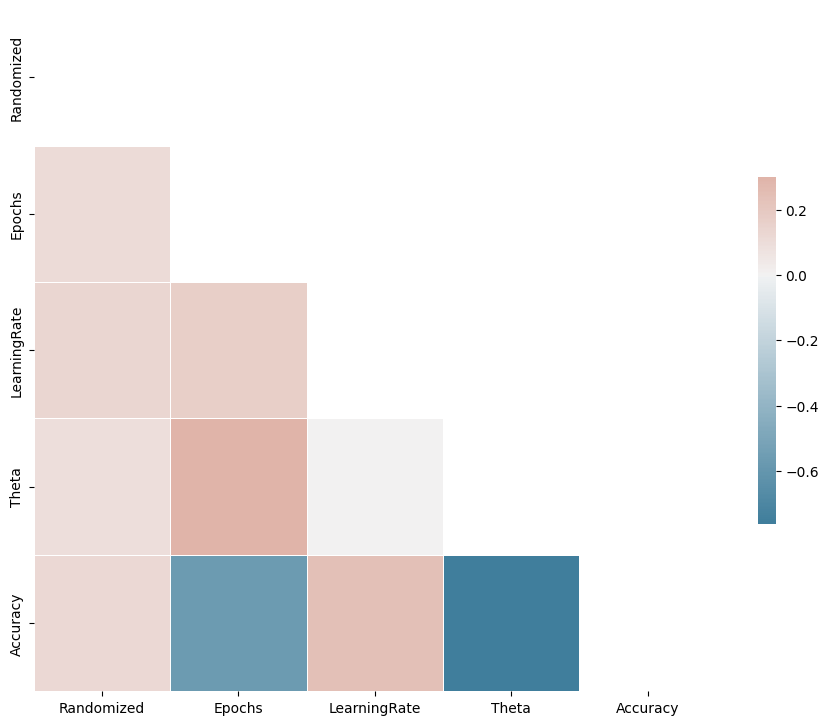

In [56]:
#plotting heatmpa for correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

This is super interesting! For clarity, the darker color respresents a negative relationship. In terms of our data, we had an extremely simple dataset, so it's not suprising that the models converged quickly. However, this helps support the fact that the more epochs our models ran, the less accurate they were. This could be due to overifitting, or other features caused our models to converge later. One of the hyperparameters we tested at an extreme raneg was our theta. We tested various values from 0 to 50. We found that our accuracy had a smooth spot if it was too low, we found that our accuracy was low, and if it was too high, our accuracy was low. This is interesting because it shows that our model is sensitive to the theta value. This makes sense because the theta value is the threshold for our weight measure. If it's too low, our model will converge too quickly and not be accurate. If it's too high, our model will take too long to converge and not be accurate. This conclusion helps support the positive relationsip we see between theta and epochs as well. 

On the same note, we see a positive relationship between learning rate and epochs. This is interesting because it shows that the higher the learning rate, the more epochs it takes for our model to converge. This makes sense because the learning rate is the step size for our model. If it's too high, our model will take too large of steps and not converge. If it's too low, our model will take too small of steps and not converge. This conclusion helps support the negative relationship we see between learning rate and accuracy.

I believe with more complex data we will see a more dynamic relationships between these features. In regards to the learning rate, I believe the relationship will be parabolic in assocation to accuracy. There will be a sweetspot where we reach the global minimum for our error margins, but if we have it too high or too low, we will not reach the global minimum due to overshooting and undershooting. Along with this relationship, we can run into the issue of an exploding gradient or vanishing gradient. This is when our learning rate is too high or too low, respectively. I believe in this case, we struggled with overfitting as our model was too complex for a simple dataset.

In [57]:
from sklearn.preprocessing import LabelEncoder

data = data.drop('ResultsFile', axis=1)
le = LabelEncoder()
data['TestFile'] = le.fit_transform(data['TestFile'])

data.head()

# Testfile == 1 is sample-data.txt, 2 is HNI-data.txt

,Model,Randomized,Epochs,LearningRate,Theta,TestFile,Accuracy
0,zeroWeights-quarterLR-tenTheta.txt,0,7,0.25,10.0,1,0.619048
1,zeroWeights-quarterLR-oneTheta.txt,0,4,0.25,1.0,1,0.619048
2,zeroWeights-quarterLR-halfTheta.txt,0,3,0.25,0.5,1,0.809524
3,zeroWeights-quarterLR-zeroTheta.txt,0,3,0.25,0.0,1,0.619048
4,zeroWeights-halfLR-oneTheta.txt,0,4,0.50,1.0,1,0.714286


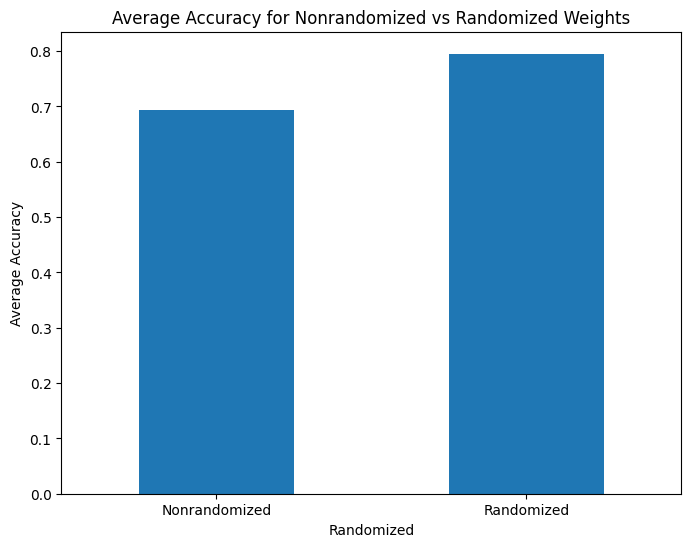

In [58]:
# testing randomization accuracies on sample-data.txt
randomized_data = data[data['TestFile'] == 1]

mean_accuracy = randomized_data.groupby('Randomized')['Accuracy'].mean()
mean_accuracy.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Nonrandomized vs Randomized Weights')
plt.xticks([0, 1], ['Nonrandomized', 'Randomized'], rotation=0)  # replace 0 and 1 with 'Nonrandomized' and 'Randomized'
plt.show()

On average, it appears our perceptron was more accurate when we randomized our weights. This makes sense as the random weights allow us to explore the space of our error margine more efficiently. Which would allow us to reach the global minimum more efficiently.

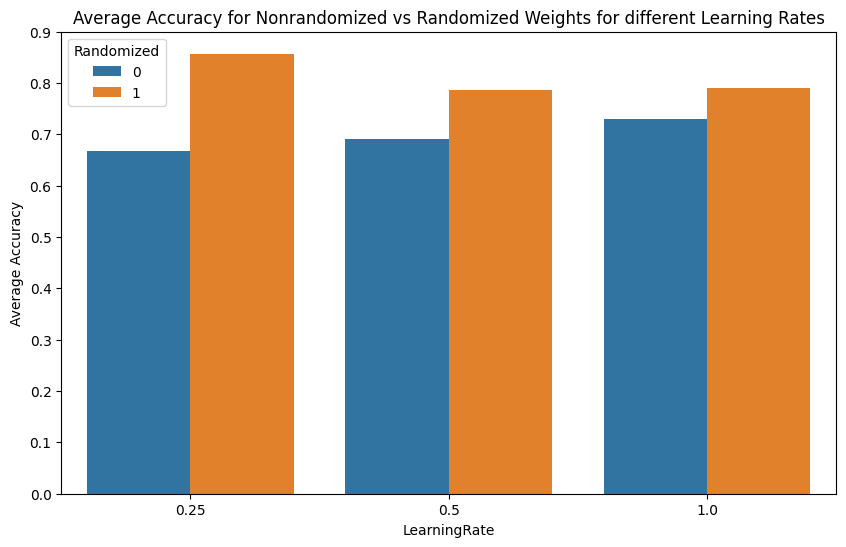

In [59]:
mean_accuracy = randomized_data.groupby(['Randomized', 'LearningRate'])['Accuracy'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='LearningRate', y='Accuracy', hue='Randomized', data=mean_accuracy)
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Nonrandomized vs Randomized Weights for different Learning Rates')
plt.show()

This is a great insight to our learning rate behavior. It seems that randomized values benefit a lot more from a lower learning rate while it's the opposite for non-randomized weights. This makes sense as the lower learning rate does not matter if our weights are zero. 

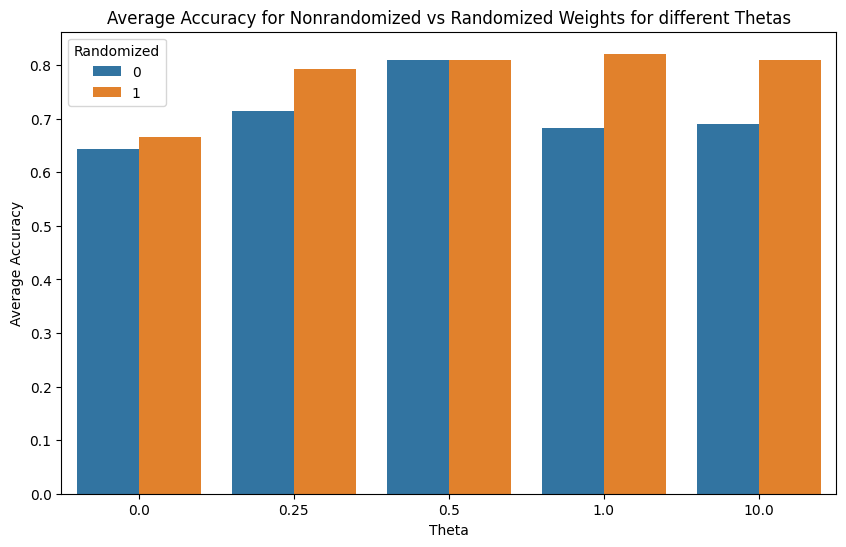

In [60]:
mean_accuracy = randomized_data.groupby(['Randomized', 'Theta'])['Accuracy'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Theta', y='Accuracy', hue='Randomized', data=mean_accuracy)
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Nonrandomized vs Randomized Weights for different Thetas')
plt.show()

This is extremely interesting, it seems as when our weights were intialized to zero, our model had a parabolic relationship to theta. On the contrary when our weights were randomized, our model also had a parabolic relationship, but it's peak was at the value theta = 1. This makes sense as tuning hyperparameters is a balancing act. If our weights are zero, we need to be more sensitive to the theta value. If our weights are randomized, we need to be less sensitive to the theta value.

## Final Remarks

With the analysis done, there are some things we could have done better. With more time, we could have measured more values such as time to train, tested more training data, and introduced other techniques such as drop out or regularization to fight against overfitting. We could have also tested more complex datasets to see how our model would behave rather than our simple dataset. 